On va travailler avec la base de données : credit scoring 

In [2]:
## import librairies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('credit-scoring.txt', sep=" ", header="infer")
data

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
1,1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
2,1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1
3,1,2,48,3,10,7582,2,1,2,3,1,4,4,31,3,2,1,4,1,2,1
4,1,2,18,2,3,3213,3,2,1,4,1,3,1,25,3,1,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0,4,12,4,9,2292,1,1,4,3,1,2,3,42,2,2,2,4,1,2,1
722,0,2,24,2,0,2718,1,3,3,2,1,4,2,20,3,1,1,2,1,2,1
723,0,2,24,2,1,12579,1,5,4,2,1,2,4,44,3,3,1,4,1,2,1
724,0,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1


In [3]:
data.columns = ["solvabilité", "etat_compte", "durée_crédit", "remb_comportement","objectif","montant_crédit","valeurs_resources_fin","stabilité_emploi","pas_mensualité","status","autre_garant","temps_logement_actuel","actif_en dur","age","autre_credit_en_cours","type_logement","nbr_credit_prec","profession","nbr_pers_garant","telef","travailleir_etranger"]
data

,solvabilité,etat_compte,durée_crédit,remb_comportement,objectif,montant_crédit,valeurs_resources_fin,stabilité_emploi,pas_mensualité,status,autre_garant,temps_logement_actuel,actif_en dur,age,autre_credit_en_cours,type_logement,nbr_credit_prec,profession,nbr_pers_garant,telef,travailleir_etranger
0,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
1,1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
2,1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1
3,1,2,48,3,10,7582,2,1,2,3,1,4,4,31,3,2,1,4,1,2,1
4,1,2,18,2,3,3213,3,2,1,4,1,3,1,25,3,1,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0,4,12,4,9,2292,1,1,4,3,1,2,3,42,2,2,2,4,1,2,1
722,0,2,24,2,0,2718,1,3,3,2,1,4,2,20,3,1,1,2,1,2,1
723,0,2,24,2,1,12579,1,5,4,2,1,2,4,44,3,3,1,4,1,2,1
724,0,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1


# Pré-traitement de la base 
Nous allons maintenant effectuer un prétraitement et une étude descriptive pour voir la structure de notre base de données.
Tout d'abord, explorons la distribution de classe cible: kredit(Solvabilité du client )




In [5]:
data.shape

(726, 21)

In [6]:
print(data.dtypes)

solvabilité              int64
etat_compte              int64
durée_crédit             int64
remb_comportement        int64
objectif                 int64
montant_crédit           int64
valeurs_resources_fin    int64
stabilité_emploi         int64
pas_mensualité           int64
status                   int64
autre_garant             int64
temps_logement_actuel    int64
actif_en dur             int64
age                      int64
autre_credit_en_cours    int64
type_logement            int64
nbr_credit_prec          int64
profession               int64
nbr_pers_garant          int64
telef                    int64
travailleir_etranger     int64
dtype: object


In [7]:
data['solvabilité'].value_counts()

1    561
0    165
Name: solvabilité, dtype: int64

Text(0, 0.5, '')

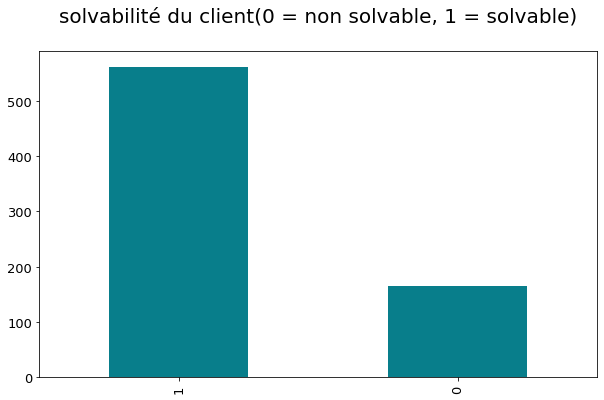

In [8]:
ax = data['solvabilité'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('solvabilité du client(0 = non solvable, 1 = solvable)', size=20, pad=30)
ax.set_ylabel('', fontsize=14)

Nous pouvons voir que nous avons 561 individus qui sont classés comme solvables alors que seulement 165 sont classés comme non solvables. Il y a donc un déséquilibre des classes qui va clairement augmenter la difficulté d'apprentissage de l'algorithme de classification. 

## Rééchantillonnage 
Afin d'avoir des données plus équilibrées, nous allons utiliser la méthode smote pour augmenter le nombre d'observations de la classe minoritaire "0 : non solvable" et arriver à un ratio = classe minoritaire/classe majoritaire satisfaisant. En effet, cette méthode fonctionne en créant des échantillons de la classe minoritaire au lieu de créer de simples copies.

## Apprentissage automatique sans SMOTE 

In [9]:
## diviser la base de données en 80% train et 20% de test :
from sklearn.model_selection import train_test_split

X = data.drop('solvabilité', axis=1)
Y = data['solvabilité']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)
print(X_train.shape)
print(y_train.shape)

(580, 20)
(580,)


### Régression logistique 

In [10]:
# Regression logistique avec validation croisé 
# choix des paramétres avec GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver="liblinear")
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

log_gs = GridSearchCV(lr, params, cv=10)
log_gs.fit(X_train, y_train)

print(log_gs.best_params_)
print("Accuracy:",log_gs.best_score_)


{'C': 10.0, 'penalty': 'l1'}
Accuracy: 0.8051724137931036


Accuracy = 0.7876712328767124
Recall =  0.926605504587156
AUC= 0.6524919414827672
matrice de confusion :
 [[ 14  23]
 [  8 101]]


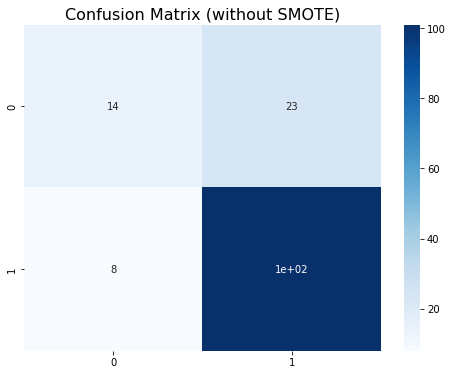

In [11]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns

lr1 = LogisticRegression(C=10.0,penalty="l1",solver="liblinear",random_state=0)
# l'entrainement du modéle 
log_gs.fit(X_train, y_train)
# prédiction 
pred = log_gs.predict(X_test)
# évaluation 
print('Accuracy =', accuracy_score(y_test, pred))
#recall = true positive /(true positive+false positive ) :cette métrique permet de mesurer à quel point l'on capture tous les vrais positifs dans nos prédictions 
print('Recall = ',recall_score(y_test, pred))
print('AUC=',roc_auc_score(y_test,pred ))
cm = confusion_matrix(y_test, pred)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

Accuracy = 0.7876712328767124
Recall =  0.9357798165137615
AUC= 0.6435655839325565
matrice de confusion :
 [[ 13  24]
 [  7 102]]


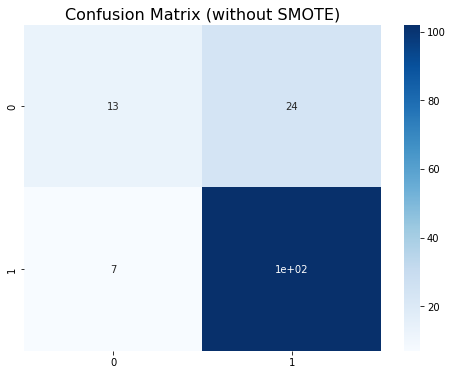

In [12]:
## regression logistique sans validation croisé 
lr2 = LogisticRegression(solver='liblinear')
lr2.fit(X_train,y_train)
# prédiction 
pred2 = lr2.predict(X_test)
print('Accuracy =', accuracy_score(y_test, pred2))
print('Recall = ',recall_score(y_test, pred2))
print('AUC=',roc_auc_score(y_test,pred2 ))
cm = confusion_matrix(y_test, pred2)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

les 2 modèles donnent presque les mêmes résultats et performances en termes de précision 

Maintenant, nous allons essayer de supprimer les entités corrélées avec le principe de l'élimination fonctionnelle récursive RFE puisqu'elles fournissent la même information .


In [59]:
## l'élimination fonctionnelle récursive RFE
from sklearn.feature_selection import RFECV
correlated_features = set()
correlation_matrix = data.drop('solvabilité', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlation_matrix.head())
print(correlated_features)

                   etat_compte  durée_crédit  ...     telef  travailleir_etranger
etat_compte           1.000000     -0.099838  ...  0.026594              0.018910
durée_crédit         -0.099838      1.000000  ...  0.184247             -0.141095
remb_comportement     0.204421     -0.051855  ...  0.021673             -0.033960
objectif             -0.094098      0.130156  ...  0.071615             -0.100296
montant_crédit       -0.105815      0.647908  ...  0.285536             -0.040402

[5 rows x 20 columns]
set()


donc nous n'avons pas des variables qui sont corrélées 

Accuracy = 0.7733333333333333
Recall =  0.7521367521367521
AUC= 0.7742165242165242
matrice de confusion :
 [[86 22]
 [29 88]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


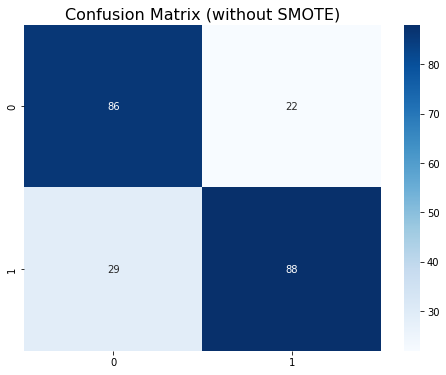

In [58]:
log_RFE =LogisticRegression(solver='liblinear',random_state=42)
log_rfecv = RFECV(estimator= log_RFE, step=1, cv=10, scoring='accuracy')#step : nombre de fonctionnalités à supprimer à chaque itération et j'ai utiliser le métrique de "accuracy" pour l'optimisation
log_rfecv.fit(X_train,y_train)
# prédiction 
pred_rfecv = log_rfecv.predict(X_test)
print('Accuracy =', accuracy_score(y_test, pred_rfecv))
print('Recall = ',recall_score(y_test, pred_rfecv))
print('AUC=',roc_auc_score(y_test,pred_rfecv ))
cm = confusion_matrix(y_test, pred_rfecv)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

##Apprentissage automatique avec SMOTE 

In [25]:
## smote 
from imblearn.over_sampling import SMOTE
smo = SMOTE ()
X_sm, y_sm = smo.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42
)
print(X_train.shape)
print(y_train.shape)


(897, 20)
(897,)


donc nos données sont bien équilibrées 

### Regression logistique 

Accuracy = 0.7866666666666666
Recall =  0.7606837606837606
AUC= 0.7877492877492878
matrice de confusion :
 [[88 20]
 [28 89]]


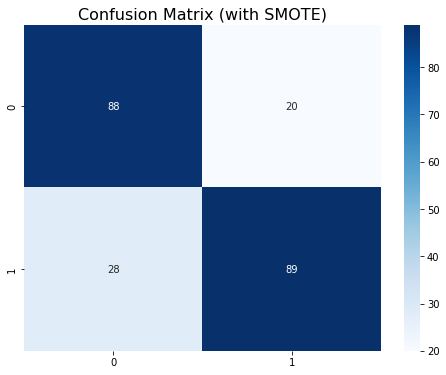

In [28]:

# Entraînement du modèle de régression logistique avec GridSearch 
lr = LogisticRegression(solver="liblinear")
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }
lr11 = GridSearchCV(lr, params, cv=10)
lr11.fit(X_train, y_train)
# Affichage des résultats
pred3 = lr11.predict(X_test)
# évaluation 
print('Accuracy =', accuracy_score(y_test, pred3))
print('Recall = ',recall_score(y_test, pred3))
print('AUC=',roc_auc_score(y_test,pred3))
cm = confusion_matrix(y_test, pred3)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.7777777777777778
Recall =  0.7777777777777778
AUC= 0.7777777777777777
matrice de confusion :
 [[84 24]
 [26 91]]


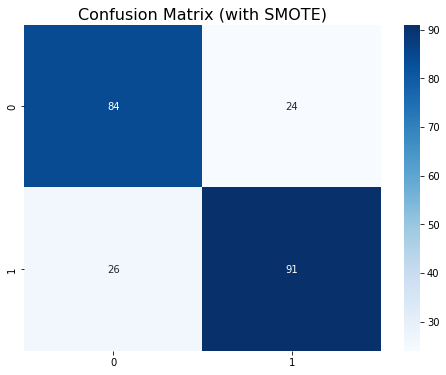

In [29]:
## regression logistique sans validation croisé 
lr2 = LogisticRegression(solver='liblinear')
lr2.fit(X_train,y_train)
# prédiction 
pred2 = lr2.predict(X_test)
print('Accuracy =', accuracy_score(y_test, pred2))
print('Recall = ',recall_score(y_test, pred2))
print('AUC=',roc_auc_score(y_test,pred2 ))
cm = confusion_matrix(y_test, pred2)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

### arbre de décision 

In [34]:
# decision tree sans validatoion croisé :
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
# choix des paramétres 
param_grid = { 'criterion':['gini','entropy'],'min_samples_split': np.arange(30, 50),'max_depth': np.arange(3, 20)}
tree_gs = GridSearchCV(tree, param_grid, cv=10)
#fit model to data
tree_gs.fit(X_train,y_train)
print(tree_gs.best_params_)



{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 40}


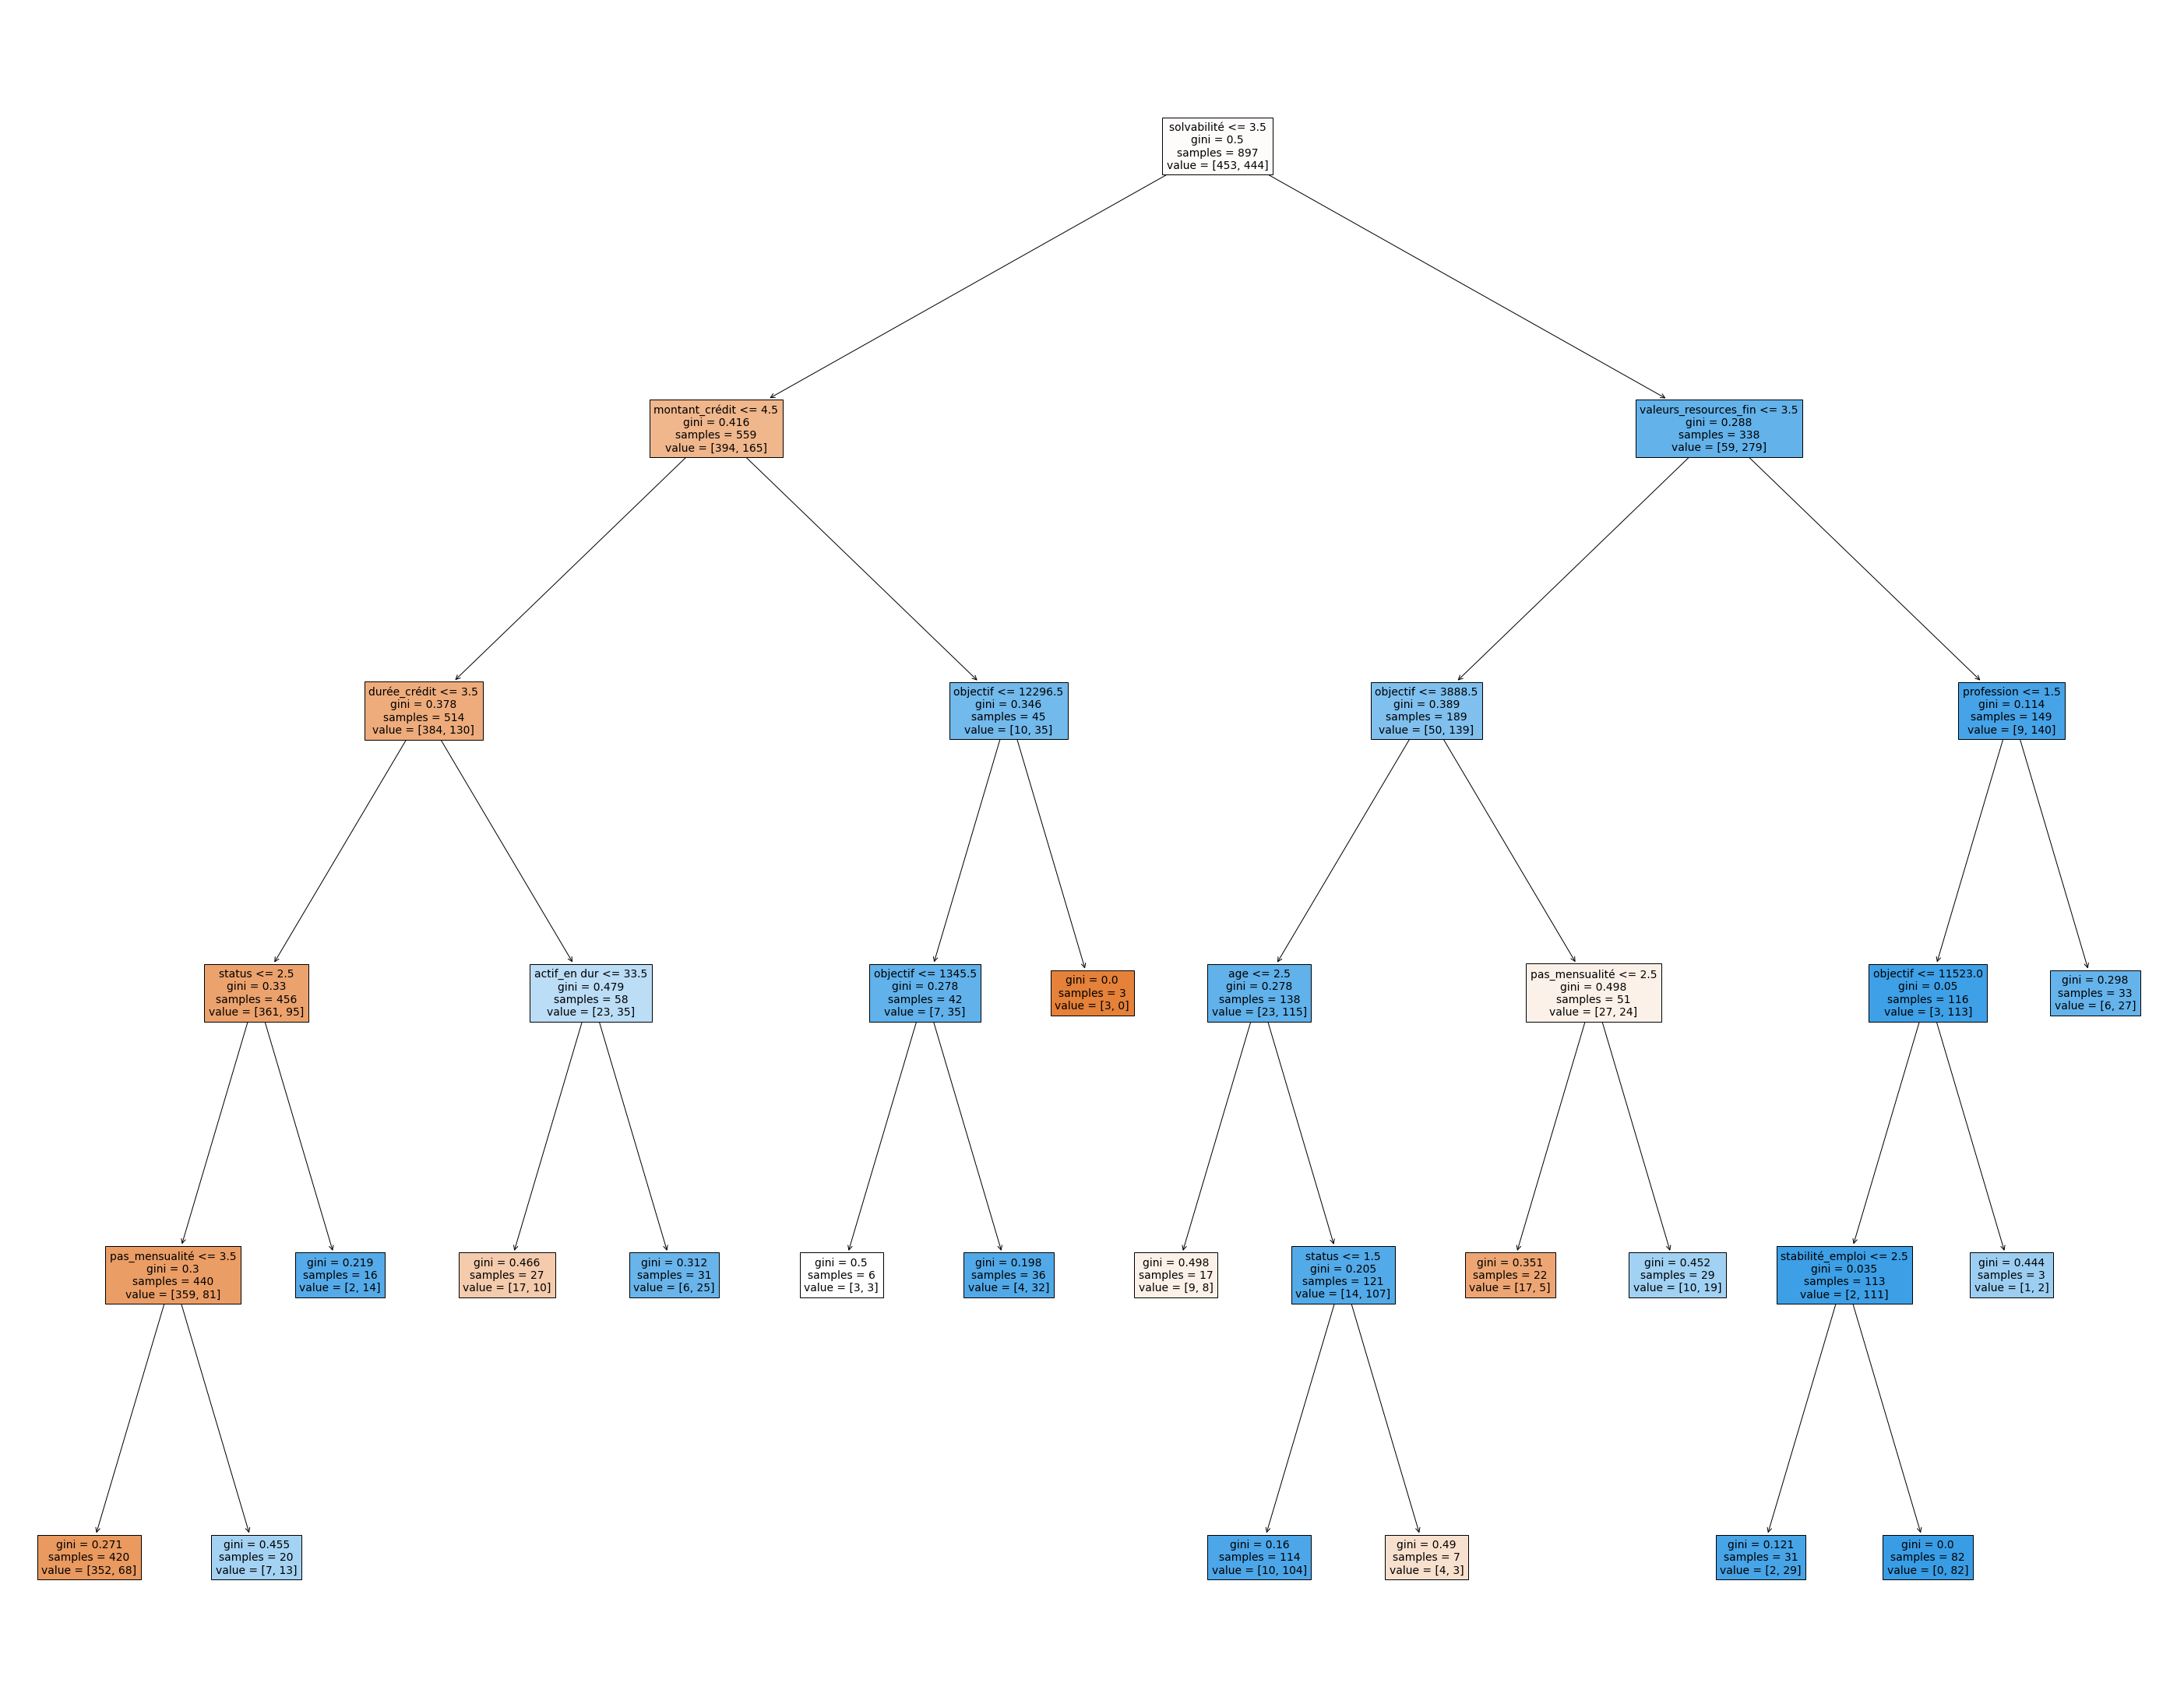

In [42]:
#Affichage graphique de l’arbre
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_split = 40,random_state=42)
dtree.fit(X_train,y_train)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
plot_tree(decision_tree=dtree,feature_names = list(data.columns[:-1]),filled=True)
plt.show()

Accuracy = 0.8
Recall =  0.7008547008547008
AUC= 0.8041310541310541
matrice de confusion :
 [[98 10]
 [35 82]]


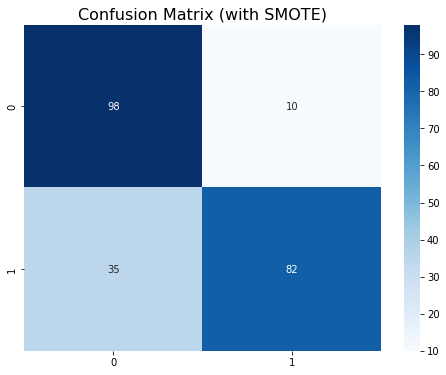

In [46]:
from sklearn.metrics import confusion_matrix
# Affichage des résultats
y_pred = tree_gs.predict(X_test)
# évaluation 
print('Accuracy =', accuracy_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('AUC=',roc_auc_score(y_test,y_pred ))

cm = confusion_matrix(y_test, y_pred)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

[Text(558.0, 475.65000000000003, 'solvabilité <= 3.5\nentropy = 1.0\nsamples = 897\nvalue = [453, 444]'),
 Text(279.0, 339.75, 'montant_crédit <= 4.5\nentropy = 0.875\nsamples = 559\nvalue = [394, 165]'),
 Text(139.5, 203.85000000000002, 'durée_crédit <= 3.5\nentropy = 0.816\nsamples = 514\nvalue = [384, 130]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.738\nsamples = 456\nvalue = [361, 95]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.969\nsamples = 58\nvalue = [23, 35]'),
 Text(418.5, 203.85000000000002, 'objectif <= 12296.5\nentropy = 0.764\nsamples = 45\nvalue = [10, 35]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.65\nsamples = 42\nvalue = [7, 35]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(837.0, 339.75, 'valeurs_resources_fin <= 3.5\nentropy = 0.668\nsamples = 338\nvalue = [59, 279]'),
 Text(697.5, 203.85000000000002, 'objectif <= 3888.5\nentropy = 0.834\nsamples = 189\nvalue = [50, 139]'),
 Text(627.75, 67.94999999999999, '

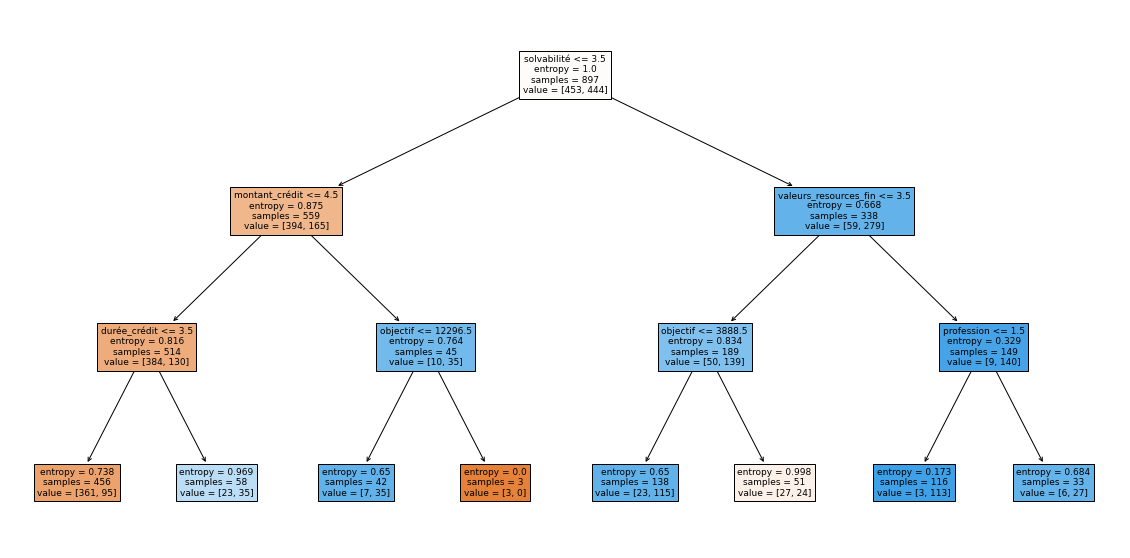

In [44]:
from sklearn.tree import DecisionTreeClassifier
#Affichage graphique de l’arbre sans GridSearch 
dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split = 3,random_state=42)
dtree2.fit(X_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(decision_tree=dtree2,feature_names = list(data.columns[:-1]),filled=True)


Accuracy = 0.7955555555555556
Recall =  0.6837606837606838
AUC= 0.8002136752136751
matrice de confusion :
 [[99  9]
 [37 80]]


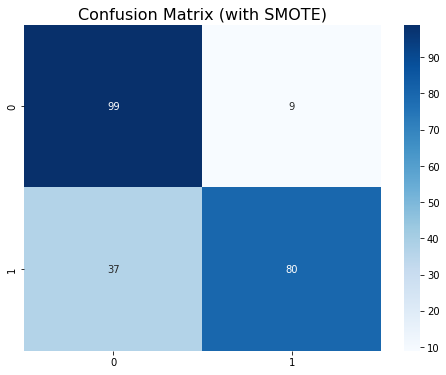

In [45]:
# Affichage des résultats
y_pred_tree = dtree2.predict(X_test)
# évaluation 
print('Accuracy =', accuracy_score(y_test,y_pred_tree))
print('Recall = ',recall_score(y_test, y_pred_tree))
print('AUC=',roc_auc_score(y_test,y_pred_tree ))

cm = confusion_matrix(y_test, y_pred_tree)
print('matrice de confusion :\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

### Random forest 

random forest : il s'agit de multiplier les arbres mais aussi de modifier légèrement les données pour chacun des n arbres pour éviter d'avoir le même arbre n fois. 


--> boostrap : c'est une méthode qui permet de construire de nouveaux échantillons par tirage aléatoire avec remise. on aura n arbres qui seront différents. après apprentissage, les règles de décision des n arbres sont stockées afin de les appliquer en mode prédictif puis chaque arbre va définir une classe d'appartenance, un vote majoritaire est appliqué pour établir la classe prédite.

Accuracy = 0.8711111111111111
Recall =  0.8205128205128205
AUC= 0.8732193732193733
matrice de confusion :
 [[100   8]
 [ 21  96]]


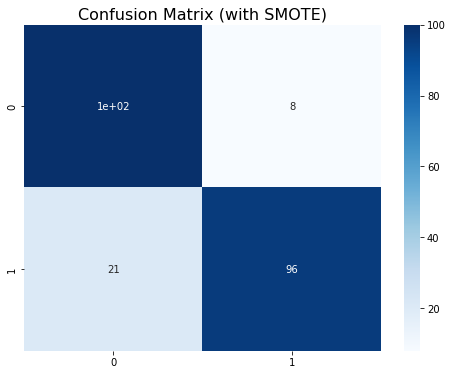

In [50]:
## random forest sans validation croisée
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

#entrainement des données
forest = RandomForestClassifier(n_estimators=100,criterion='gini', min_samples_split=2, max_features='auto' ,bootstrap=True,) 
forest.fit(X_train,y_train) 
preds = forest.predict(X_test)
# Evaluation
print('Accuracy =', accuracy_score(y_test,preds)) 
print('Recall = ',recall_score(y_test, preds)) 
print('AUC=',roc_auc_score(y_test,preds))

cm = confusion_matrix(y_test, preds) 
print('matrice de confusion :\n',cm) 
plt.figure(figsize=(8, 6)) 
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

In [51]:
# Random forest avec validation croisée 
from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier(random_state= 1)
# choix des paramétres 
param_grid = { 'criterion':['gini','entropy'],'n_estimators': np.arange(1,10,100),'max_depth': np.arange(3, 20),'max_features':["auto", "sqrt", "log2"]}
forest_gs = GridSearchCV(forest2, param_grid, cv=10)
#fit model to data
forest_gs.fit(X_train,y_train)
print(forest_gs.best_params_)


{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 1}


Accuracy = 0.7822222222222223
Recall =  0.6752136752136753
AUC= 0.7866809116809117
matrice de confusion :
 [[97 11]
 [38 79]]


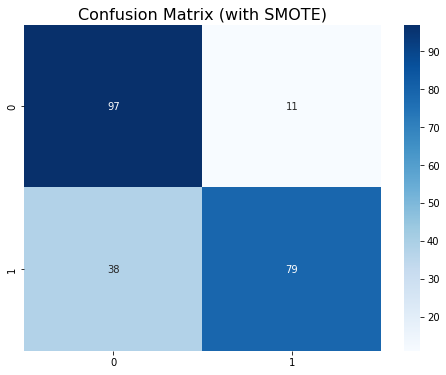

In [52]:
# prediction 
pred_forest = forest_gs.predict(X_test)
# Evaluation
print('Accuracy =', accuracy_score(y_test,pred_forest)) 
print('Recall = ',recall_score(y_test, pred_forest)) 
print('AUC=',roc_auc_score(y_test,pred_forest))

cm = confusion_matrix(y_test, pred_forest) 
print('matrice de confusion :\n',cm) 
plt.figure(figsize=(8, 6)) 
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

### SVM linéaire

In [54]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
## SVM 
clf = SVC(C=0.1, kernel='linear')
pred_svm=clf.fit(X_train,y_train)

Accuracy = 0.7866666666666666
Recall =  0.7350427350427351
AUC= 0.7888176638176638
matrice de confusion :
 [[91 17]
 [31 86]]


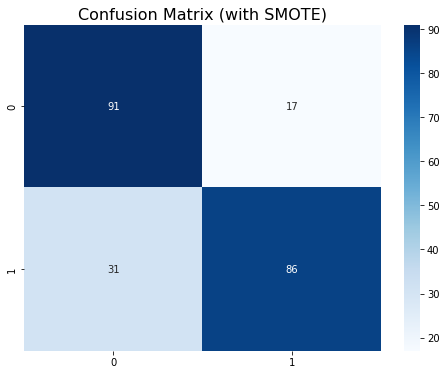

In [55]:
pred_svm = clf.predict(X_test)
# Evaluation
print('Accuracy =', accuracy_score(y_test,pred_svm)) 
print('Recall = ',recall_score(y_test, pred_svm)) 
print('AUC=',roc_auc_score(y_test,pred_svm))

cm = confusion_matrix(y_test, pred_svm) 
print('matrice de confusion :\n',cm) 
plt.figure(figsize=(8, 6)) 
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')